In [36]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [37]:
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4

x = numpy.linspace(0.0,Lx,num = nx)
y = numpy.linspace(0.0,Ly,num = ny)

#  initial conditions:
T0 = 20.0 * numpy.ones((ny,nx))
T0[0,:] = 100.0
T0[:,0] = 100.0


In [49]:
def ftcs (T0,nt,dt,dx,dy,alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I = int(nx/2)
    J = int(ny/2)
    for n in range (nt):
        for j in range (1 , ny - 1):
            for i in range (1 , nx - 1):
                T[j,i] = (T[j,i]+sigma_x*(T[j,i-1]-2*T[j,i]+T[j,i+1])
                          +sigma_y*(T[j-1,i]-2*T[j,i]+T[j+1,i]))        
        T[0,:] = 100
        T[:,0] = 100
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        if T[J,I] >= 70.0:
            break
    print('Time step{}; temperature at center is {} C'. format(n , T[J,I]))
    return T
        

In [50]:
sigma = 0.5
dt = sigma / (alpha *(1/dx**2+1/dy**2))
nt = 500

In [51]:
T = ftcs (T0,nt,dt,dx,dy,alpha)

Time step127; temperature at center is 70.12723235676388 C


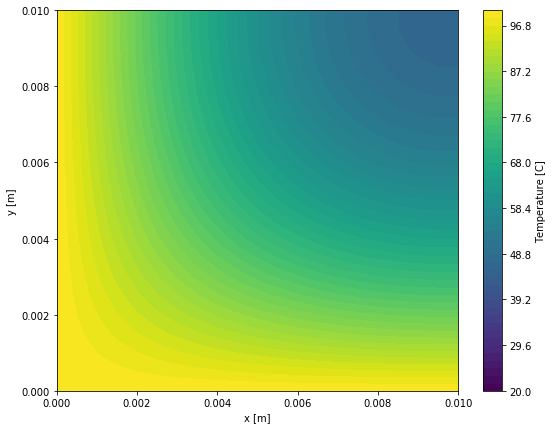

In [62]:
pyplot.figure(figsize=(9.0,7.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20,100,num=51)
contf = pyplot.contourf(x,y,T,levels = levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')

In [64]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy import linalg

In [65]:
def btcs(T0,nt,dt,delta,alpha,Tb):
    ny , nx = T0.shape
    M, N = nx - 2, ny - 2
    sigma = alpha * dt / delta**2
    A = lhs_operator(M,N,sigma)
    T = T0[1:-1 , 1:-1].flatten()
    I,J = int (M/2), int(N/2)
    for n in range(nt):
        b = rhs_vector(T,M,N,sigma,Tb)
        T = linalg.solve(A,b)
        if T(J*M+1)>=70.0:
            break
    print ('Time step{}; temperature at center is {} C'.cormat (n,T[J*M+I]))
    return map_1d_to_2d(T,nx,ny,Tb)


In [66]:
def map_1d_to_2d(T1,nx,ny,Tb):
    T = numpy.zeros((ny,nx))
    T[1:-1,1:-1] = T1.reshape((ny-2,nx-2))
    T[:,0] = Tb
    T[0,:] = Tb
    T[:,-1] = T[:,-2]
    T[-1,:] = T[-2,:]
    return T

In [67]:
def rhs_vector(T,M,N,sigma,Tb):
    b = T / sigma
    for j in range (N):
        for i in range (M):
            I = j*M+i
            if i == 0:
                b[I] += Tb
            if j == 0:
                b[I] += Tb
    return b

In [72]:
def lhs_operator(M,N,sigma):
    A = numpy.zeros((M*N,M*N))
    for j in range (N):
        for i in range (M):
            I = j*M+i
            IS = I - M
            IW = I - 1
            IE = I + 1
            IN = I + M
            if i == 0 and j == 0:
                A[I,I] = 1.0/sigma +4
                A[I,IE] = -1.0
                A[I,IN] = -1.0
            elif i == 0 and j == N-1:
                A[I,I] = 1.0 / sigma +3.0
                A[I,IS] = -1.0
                A[I,IE] = -1.0
            elif i==M-1 and j==0:
                A[I,I] = 1.0/sigma +3
                A[I,IE] = -1.0
                A[I,IN] = -1.0
            elif i == M -1 
                A[I,I] = 1.0/sigma +4
                A[I,IE] = -1.0
                A[I,IN] = -1.0
            elif i == 0:
                A[I,I] = 1.0 / sigma +4.0
                A[I,IS] = -1.0
                A[I,IE] = -1.0
                A[I,IN] = -1.0
            elif j == 0:
                A[I,I] = 1.0 / sigma +4.0
                A[I,IW] = -1.0
                A[I,IE] = -1.0
                A[I,IN] = -1.0
            elif i == M-1:
                A[I,I] = 1.0 / sigma +3.0
                A[I,IS] = -1.0
                A[I,IW] = -1.0
                A[I,IN] = -1.0
            elif j == N-1:
                A[I,I] = 1.0 / sigma +3.0
                A[I,IS] = -1.0
                A[I,IW] = -1.0
                A[I,IE] = -1.0
            else :
                A[I,I] = 1.0 / sigma +4.0
                A[I,IS] = -1.0
                A[I,IW] = -1.0
                A[I,IE] = -1.0
                A[I,IN] = -1.0
    return A